In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import quantile_transform as qt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_csv("../../data/merged_score.csv")

In [3]:
# Check for missing values
data.isnull().sum()

COPD Mortality Rate                        0
% Unemployed                               0
% Rural                                    0
% Severe Housing Cost Burden               0
% households wo car                        0
Number of Hospitals                        0
% disabled                                 0
% Fair or Poor Health                      0
% Severe Housing Problems                  0
% Enrolled in Free or Reduced Lunch        0
% Single-Parent Households                 0
Hypertension Death Rate                    0
% Adults 65 and Older                      0
covid_cases                                0
Income Ratio                               0
% Without Health Insurance                 0
% Children in Poverty                      0
% Limited English Proficiency              0
% Diagnosed Diabetes                       0
High School Graduation Rate                0
Primary Care Physicians Rate               0
opioid death rate                          0
Heart Dise

In [4]:
data=data.dropna()

In [5]:
data.columns

Index(['COPD Mortality Rate', '% Unemployed', '% Rural',
       '% Severe Housing Cost Burden', '% households wo car',
       'Number of Hospitals', '% disabled', '% Fair or Poor Health',
       '% Severe Housing Problems', '% Enrolled in Free or Reduced Lunch',
       '% Single-Parent Households', 'Hypertension Death Rate',
       '% Adults 65 and Older', 'covid_cases', 'Income Ratio',
       '% Without Health Insurance', '% Children in Poverty',
       '% Limited English Proficiency', '% Diagnosed Diabetes',
       'High School Graduation Rate', 'Primary Care Physicians Rate',
       'opioid death rate', 'Heart Disease Death Rate', '% Nonwhite',
       '% workers commuting by public transit', '%  Adults with Obesity',
       '% Smokers', '% Veterans in Civilian Adult Population'],
      dtype='object')

In [6]:
X_norm1=qt(data, n_quantiles=5, random_state=13, copy=False)



Cluster 2 Inertia 4368.195633235417
Cluster 3 Inertia 3802.868973794435
Cluster 4 Inertia 3564.6283540285094
Cluster 5 Inertia 3404.737969859701
Cluster 6 Inertia 3270.7799824535705
Cluster 7 Inertia 3164.857774403472


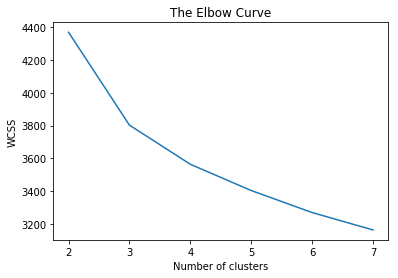

In [20]:
wcss = []  #Within-Cluster-Sum-of-Squares
end=8
for i in range(2,end):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_norm1)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(2,end),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

Cluster 2 Inertia 118132151893.02133
Cluster 3 Inertia 49476310735.323135
Cluster 4 Inertia 29005248895.921616
Cluster 5 Inertia 17264841316.5376
Cluster 6 Inertia 9839250782.093714
Cluster 7 Inertia 7108203003.412861
Cluster 8 Inertia 5220322562.2971115
Cluster 9 Inertia 3633655643.315061
Cluster 10 Inertia 2921374975.8493466


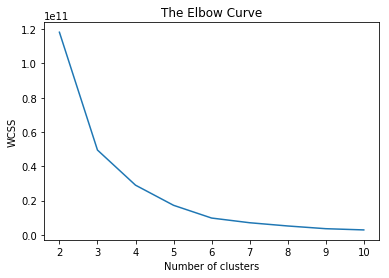

In [8]:
wcss = []  #Within-Cluster-Sum-of-Squares
end=11
for i in range(2,end):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(2,end),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

No. Clusters: 2, Silhouette Score: 0.158, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.152, Change from Previous Cluster: -0.006
No. Clusters: 4, Silhouette Score: 0.122, Change from Previous Cluster: -0.03
No. Clusters: 5, Silhouette Score: 0.11, Change from Previous Cluster: -0.012
No. Clusters: 6, Silhouette Score: 0.101, Change from Previous Cluster: -0.009
No. Clusters: 7, Silhouette Score: 0.103, Change from Previous Cluster: 0.002
No. Clusters: 8, Silhouette Score: 0.105, Change from Previous Cluster: 0.002
No. Clusters: 9, Silhouette Score: 0.101, Change from Previous Cluster: -0.004
No. Clusters: 10, Silhouette Score: 0.098, Change from Previous Cluster: -0.003
No. Clusters: 11, Silhouette Score: 0.09, Change from Previous Cluster: -0.008
No. Clusters: 12, Silhouette Score: 0.087, Change from Previous Cluster: -0.003
No. Clusters: 13, Silhouette Score: 0.076, Change from Previous Cluster: -0.011
No. Clusters: 14, Silhouette Score: 0.079, Change from P

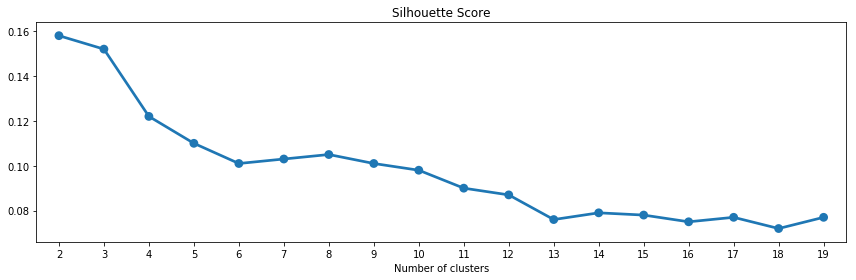

In [22]:

n_clu = []
km_ss = []

start=2
end=20
# Create a for loop to find optimal n_clusters
for n_clusters in range(start,end):

    # Create cluster labels
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X_norm1)

    silhouette_avg = round(silhouette_score(X_norm1, labels, random_state=1), 3)

    # Append score to lists
    km_ss.append(silhouette_avg)
    n_clu.append(n_clusters)

    print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
        n_clusters, silhouette_avg, (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

    # Plot graph at the end of loop
    if n_clusters == end - 1:
        plt.figure(figsize=(12,4))

        plt.title('Silhouette Score')
        plt.xlabel("Number of clusters")
        sns.pointplot(x=n_clu, y=km_ss)
        plt.tight_layout()
        plt.show()

No. Clusters: 2, Silhouette Score: 0.976, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.913, Change from Previous Cluster: -0.063
No. Clusters: 4, Silhouette Score: 0.88, Change from Previous Cluster: -0.033
No. Clusters: 5, Silhouette Score: 0.88, Change from Previous Cluster: 0.0
No. Clusters: 6, Silhouette Score: 0.831, Change from Previous Cluster: -0.049
No. Clusters: 7, Silhouette Score: 0.801, Change from Previous Cluster: -0.03
No. Clusters: 8, Silhouette Score: 0.755, Change from Previous Cluster: -0.046
No. Clusters: 9, Silhouette Score: 0.73, Change from Previous Cluster: -0.025
No. Clusters: 10, Silhouette Score: 0.668, Change from Previous Cluster: -0.062
No. Clusters: 11, Silhouette Score: 0.668, Change from Previous Cluster: 0.0
No. Clusters: 12, Silhouette Score: 0.608, Change from Previous Cluster: -0.06
No. Clusters: 13, Silhouette Score: 0.611, Change from Previous Cluster: 0.003
No. Clusters: 14, Silhouette Score: 0.608, Change from Previous

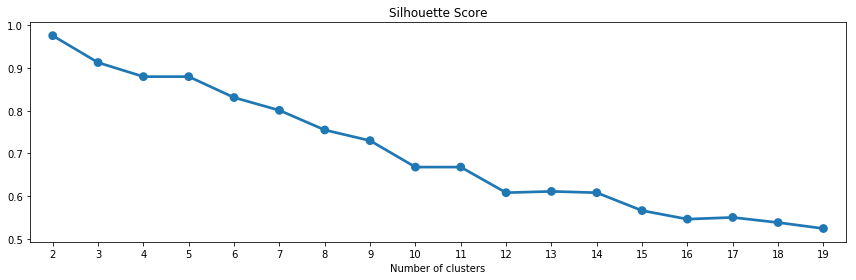

In [47]:
import seaborn as sns
from sklearn.metrics import silhouette_score
n_clu = []
km_ss = []

start=2
end=20
# Create a for loop to find optimal n_clusters
for n_clusters in range(start,end):

    # Create cluster labels
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(data)

    silhouette_avg = round(silhouette_score(data, labels, random_state=1), 3)

    # Append score to lists
    km_ss.append(silhouette_avg)
    n_clu.append(n_clusters)

    print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
        n_clusters, silhouette_avg, (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

    # Plot graph at the end of loop
    if n_clusters == end - 1:
        plt.figure(figsize=(12,4))

        plt.title('Silhouette Score')
        plt.xlabel("Number of clusters")
        sns.pointplot(x=n_clu, y=km_ss)
        plt.tight_layout()
        plt.show()

## BIC score with a Gaussian Mixture Model

In [48]:


gm_bic= []
gm_score=[]
for i in range(2,15):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_norm1)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_norm1)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_norm1)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_norm1))
    gm_score.append(gm.score(X_norm1))

BIC for number of cluster(s) 2: -39875.10437783744
Log-likelihood score for number of cluster(s) 2: 7.202008190510743
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -43636.87954954723
Log-likelihood score for number of cluster(s) 3: 8.22049033377821
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -47264.57806920589
Log-likelihood score for number of cluster(s) 4: 9.217561322134923
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -49492.891022061296
Log-likelihood score for number of cluster(s) 5: 9.99115968723976
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -49637.778147333345
Log-likelihood score for number of cluster(s) 6: 10.432048721845817
-----

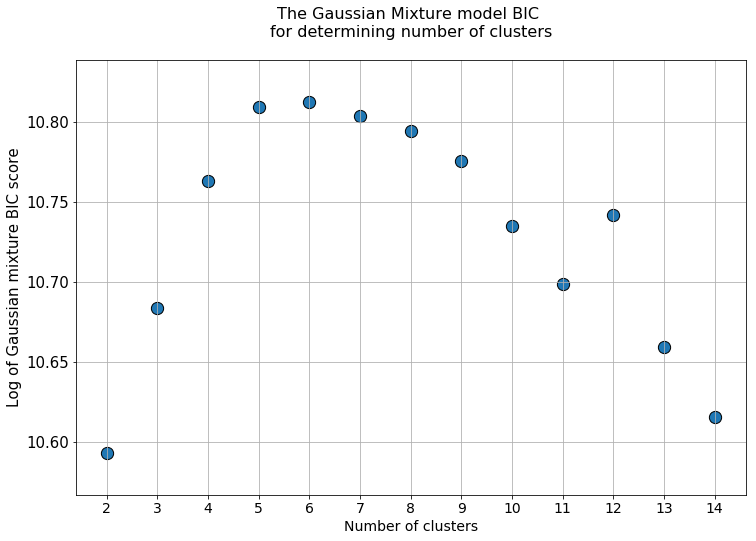

In [49]:
plt.figure(figsize=(12,8))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


In [9]:
new_data=pd.DataFrame(data=X_norm1,columns=data.columns.tolist())

In [51]:
from sklearn.metrics import davies_bouldin_score
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_
    score=davies_bouldin_score(data, labels)
    print("Cluster", i, "Davis Score", score)

Cluster 2 Davis Score 0.2698667039434489
Cluster 3 Davis Score 0.4238123564717742
Cluster 4 Davis Score 0.4249308549788532
Cluster 5 Davis Score 0.31677949391879395
Cluster 6 Davis Score 0.35898580176620704
Cluster 7 Davis Score 0.3809919524528171
Cluster 8 Davis Score 0.4061651822965894
Cluster 9 Davis Score 0.396405968453023


In [52]:
from sklearn.metrics import davies_bouldin_score
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_
    score=davies_bouldin_score(data, labels)
    print("Cluster", i, "Davis Score", score)

Cluster 2 Davis Score 0.2698667039434489
Cluster 3 Davis Score 0.4238123564717742
Cluster 4 Davis Score 0.4249308549788532
Cluster 5 Davis Score 0.31677949391879395
Cluster 6 Davis Score 0.35898580176620704
Cluster 7 Davis Score 0.3809919524528171
Cluster 8 Davis Score 0.4061651822965894
Cluster 9 Davis Score 0.396405968453023


In [10]:
model=  KMeans(
               n_clusters=3,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )
model.fit(new_data)
label=pd.DataFrame(model.labels_)

In [11]:
new_data['class']=label

In [12]:
new_data['class'].value_counts()

1    1239
2    1025
0     867
Name: class, dtype: int64

In [13]:
new_data['class']

0       1
1       0
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
3101    2
3102    0
3103    0
3104    2
3105    2
3106    0
3107    0
3108    0
3109    2
3110    0
3111    0
3112    2
3113    2
3114    0
3115    2
3116    2
3117    2
3118    0
3119    2
3120    0
3121    2
3122    2
3123    2
3124    0
3125    2
3126    0
3127    0
3128    0
3129    2
3130    2
Name: class, Length: 3131, dtype: int32

C:\Users\ashay\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


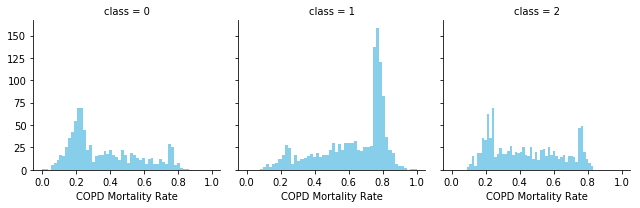

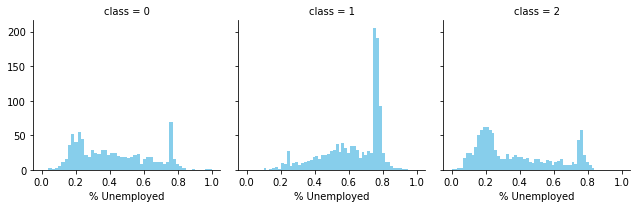

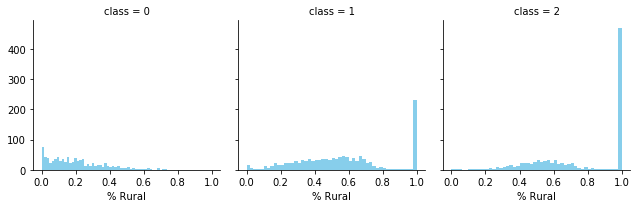

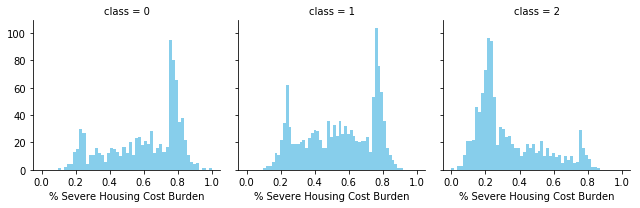

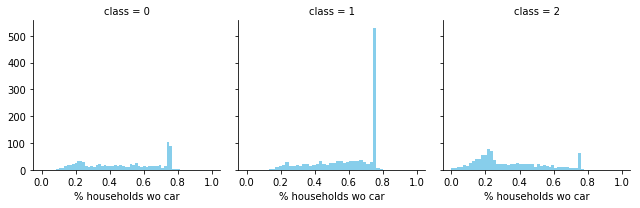

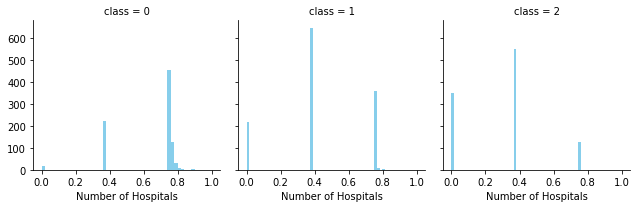

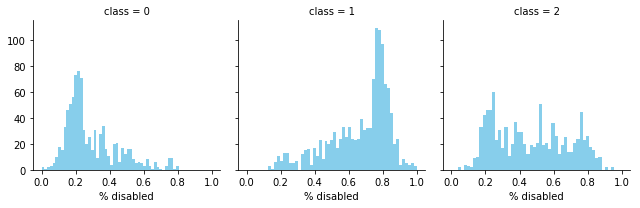

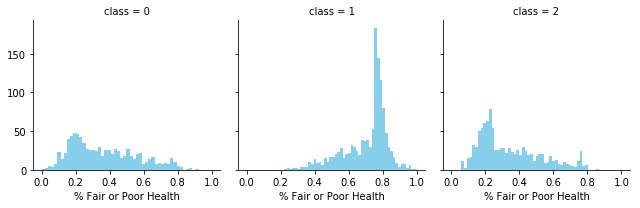

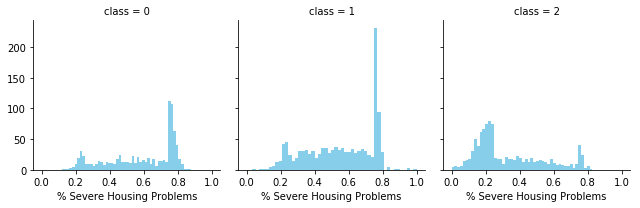

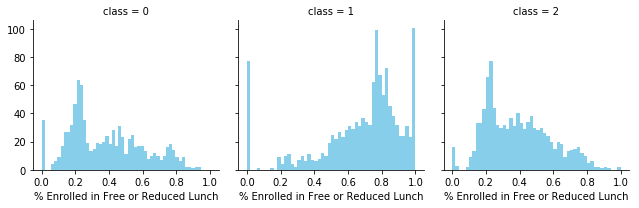

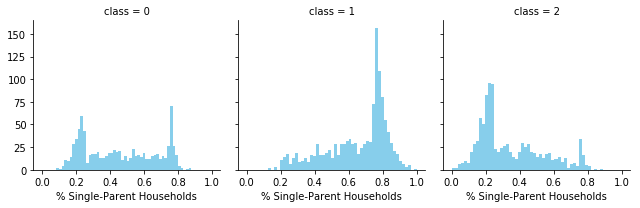

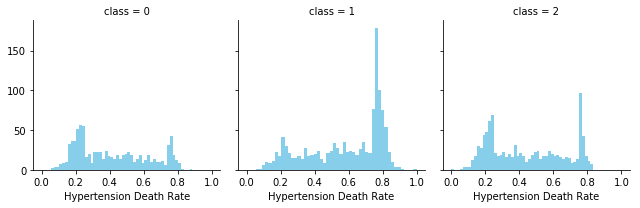

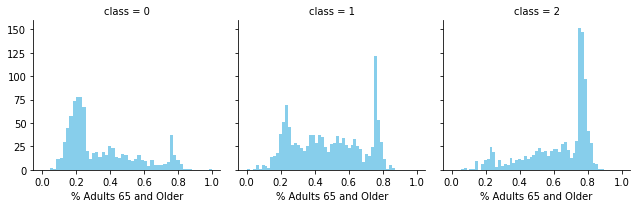

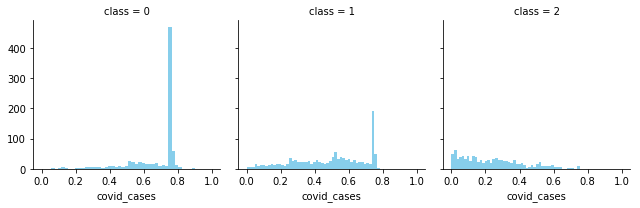

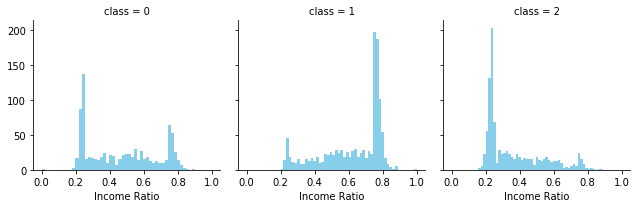

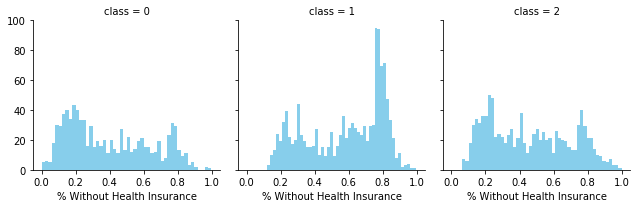

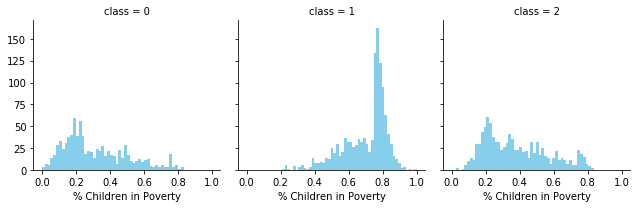

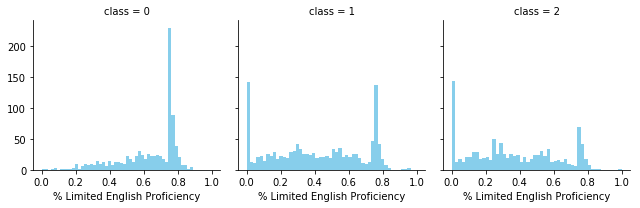

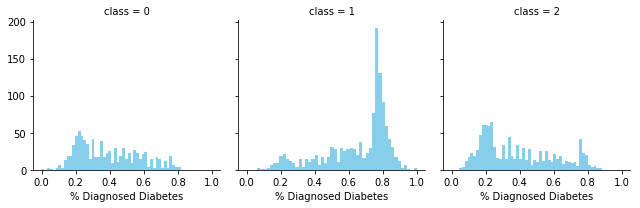

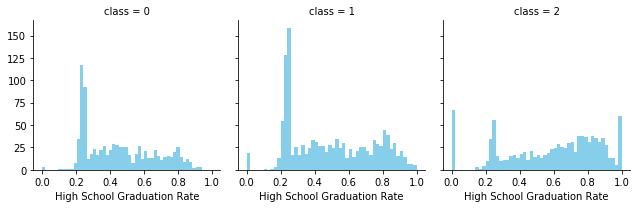

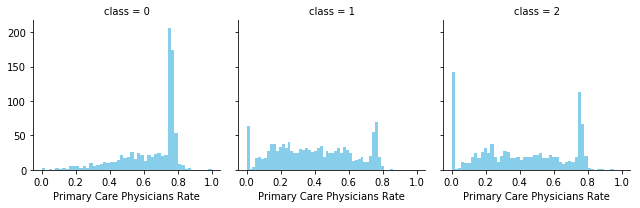

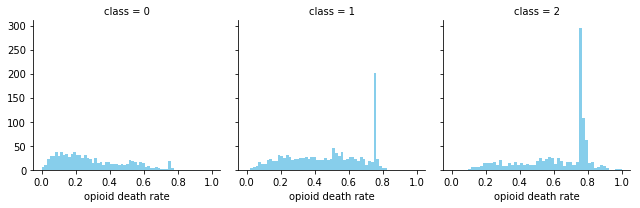

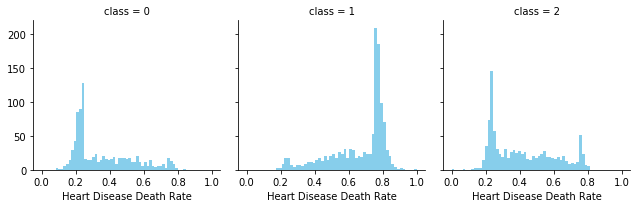

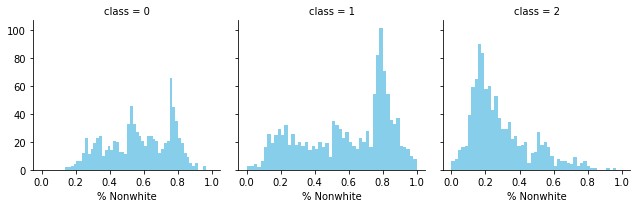

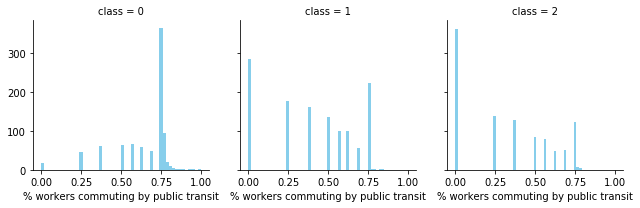

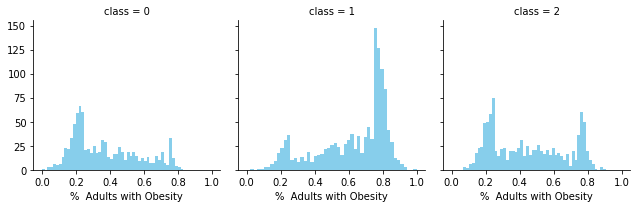

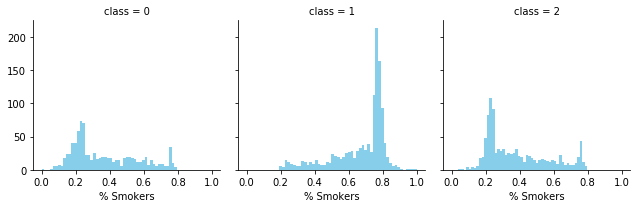

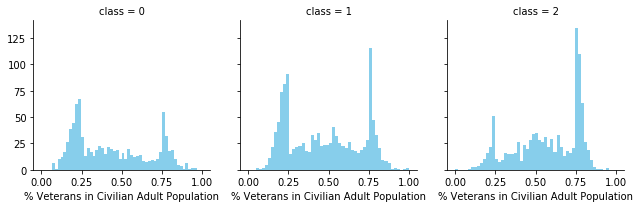

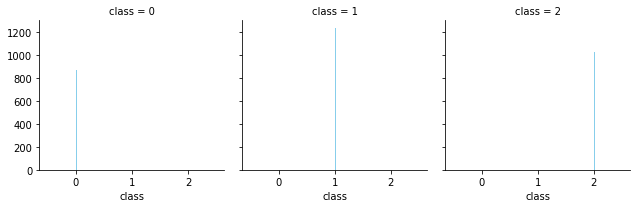

In [16]:
for features in new_data:
    grid= sns.FacetGrid(new_data, col='class')
    color='red' if features=="Deaths" else 'skyblue'
    grid.map(plt.hist, features,bins=50,color=color)

In [18]:
from sklearn.metrics import classification_report as clf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data[new_data.columns[:-1]],new_data['class'], test_size=0.33, random_state=42)

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
test_model=ExtraTreesClassifier()

test_model.fit(X_train,y_train)

y_pred = test_model.predict(X_test)
print(clf(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       287
           1       0.96      0.98      0.97       411
           2       0.95      0.95      0.95       336

    accuracy                           0.96      1034
   macro avg       0.96      0.96      0.96      1034
weighted avg       0.96      0.96      0.96      1034



In [20]:
feature_importance = test_model.feature_importances_
  

feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        test_model.estimators_],
                                        axis = 0)

In [21]:
Feature_score=(sorted(zip(feature_importance_normalized, X_train.columns), reverse=True))[:10]

top_ten_columns=[]
for val in Feature_score:
    top_ten_columns.append(val[1])

In [22]:
columns=top_ten_columns

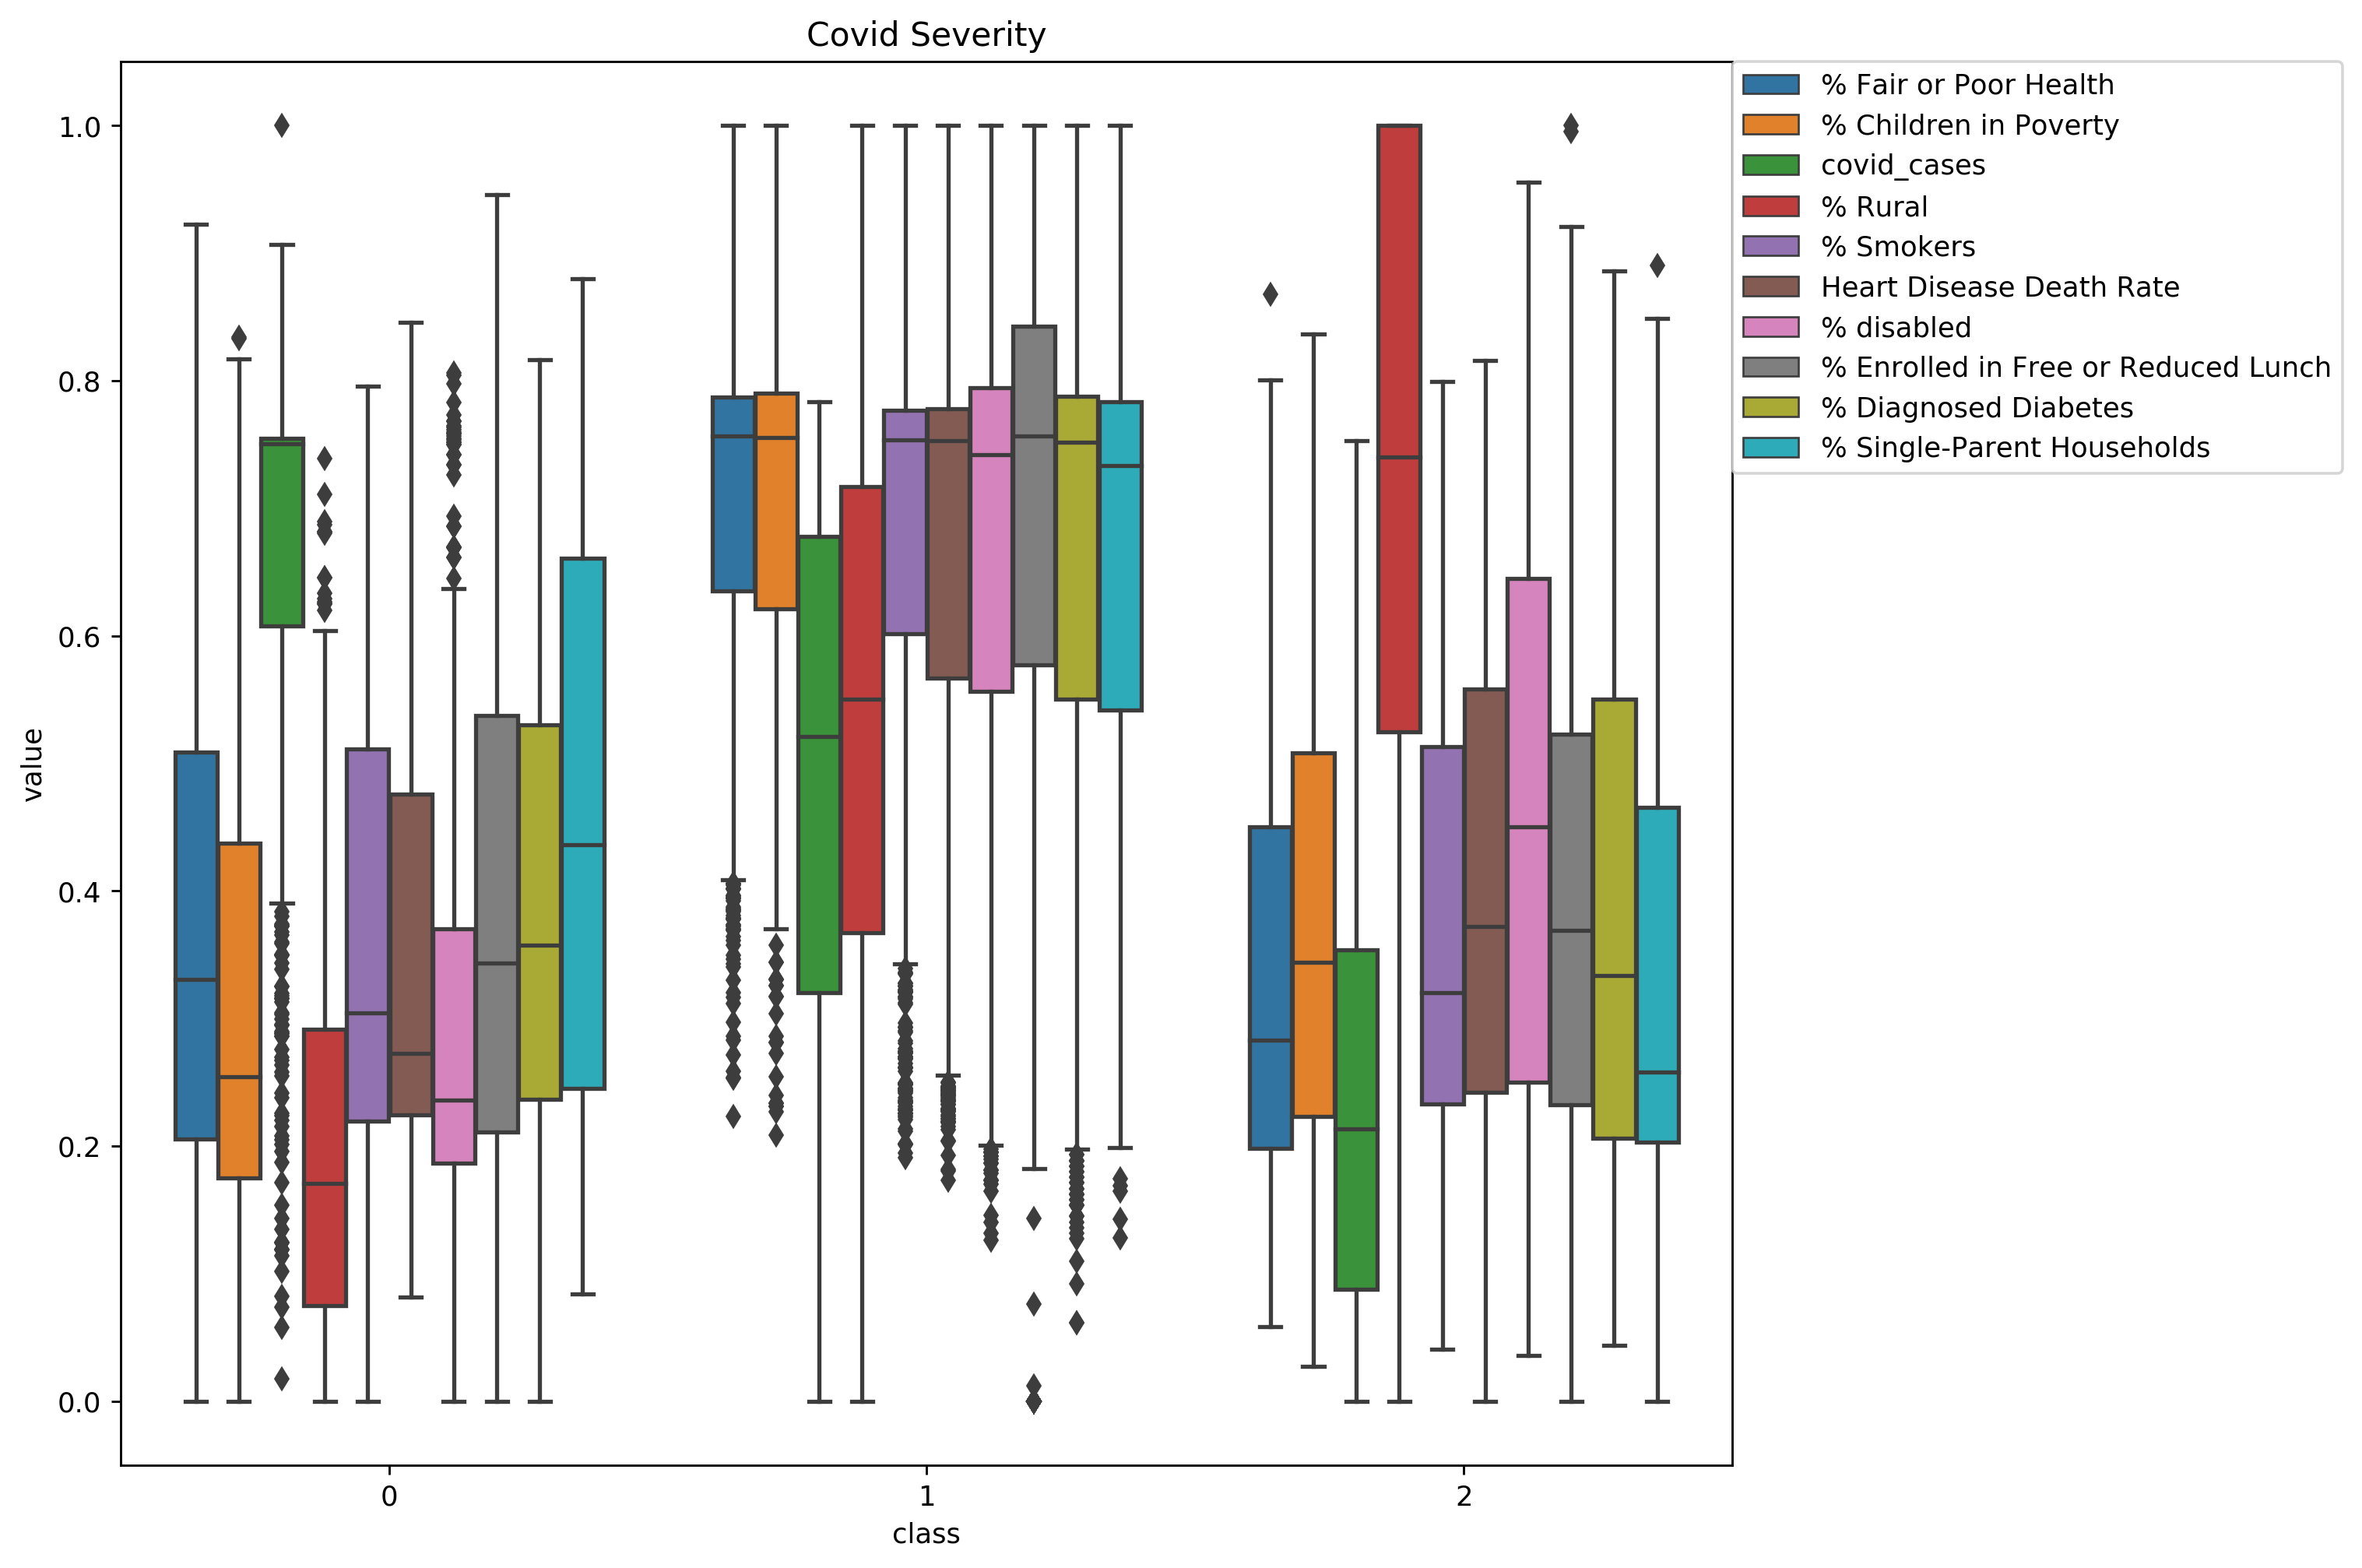

In [23]:
import seaborn as sns


plt.figure(frameon=False,figsize=(12,8),dpi=255)
dd=pd.melt(new_data,id_vars=['class'],value_vars=columns,var_name='boxplot',)
sns.boxplot(x='class',y='value',data=dd,hue='boxplot',)
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0,)
plt.title("Covid Severity")
plt.tight_layout()

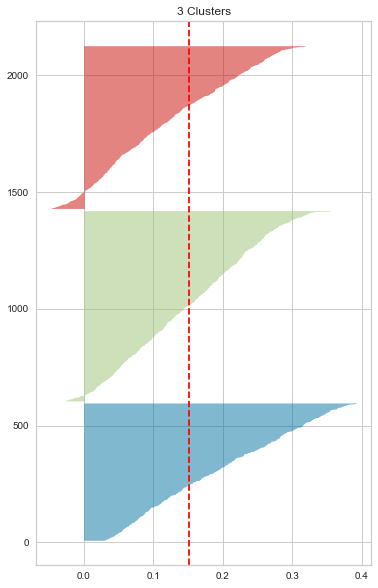

In [40]:
from yellowbrick.cluster import SilhouetteVisualizer


for i in range(1):
    plt.figure(figsize=(6,10))
    plt.title(str(3)+" Clusters")
    km = KMeans (n_clusters=3,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(X_train)


In [89]:
# from yellowbrick.features import manifold_embedding
# visualizer = manifold_embedding(X_test, y_test)

## Intercluster Distance Maps
Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership,<br><br> e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

## PCA Plot

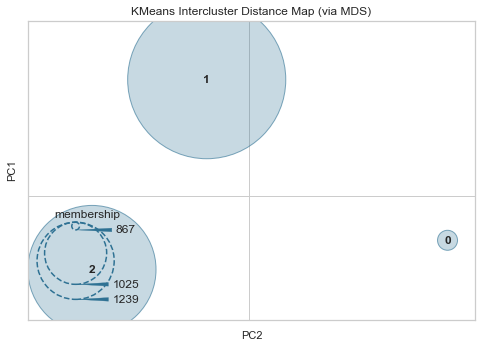

In [25]:
from yellowbrick.cluster import intercluster_distance



visualizer = intercluster_distance(
                KMeans(
               n_clusters=3,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42),
               X_norm1)

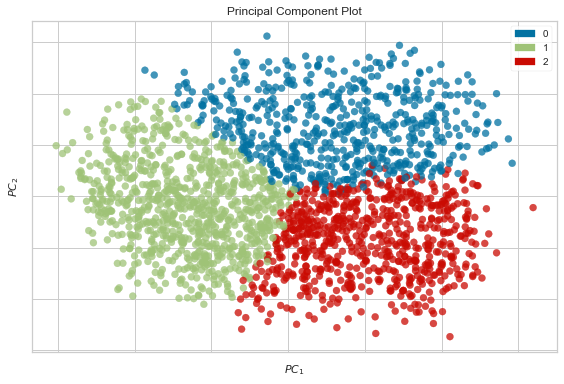

In [26]:
from yellowbrick.features import pca_decomposition
visualizer = pca_decomposition(X_train,y_train)

In [34]:
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [35]:
slc =  {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X_norm1)
    if k == 2: labels = kmeans.labels_
    clusters = kmeans.labels_
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
#     db[k] = davies_bouldin_score(X,clusters)
    slc[k] = silhouette_score(X_norm1,clusters)

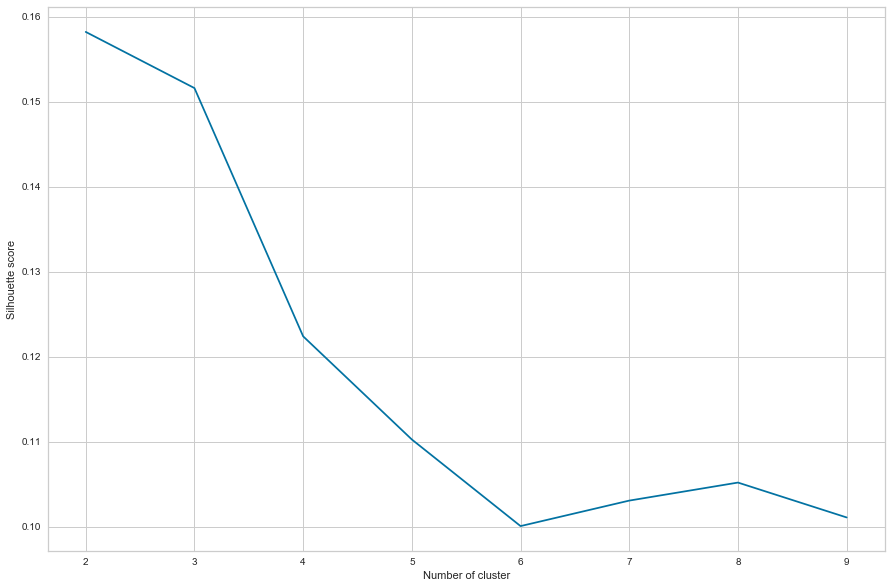

In [36]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.15822206842814404
For n_clusters = 3 The average silhouette_score is : 0.15161083668209854
For n_clusters = 4 The average silhouette_score is : 0.12239247199097497
For n_clusters = 5 The average silhouette_score is : 0.1102496925414532
For n_clusters = 6 The average silhouette_score is : 0.10005686936408902
For n_clusters = 7 The average silhouette_score is : 0.10305740050861487
For n_clusters = 8 The average silhouette_score is : 0.10518011072137384
For n_clusters = 9 The average silhouette_score is : 0.10107327236999385


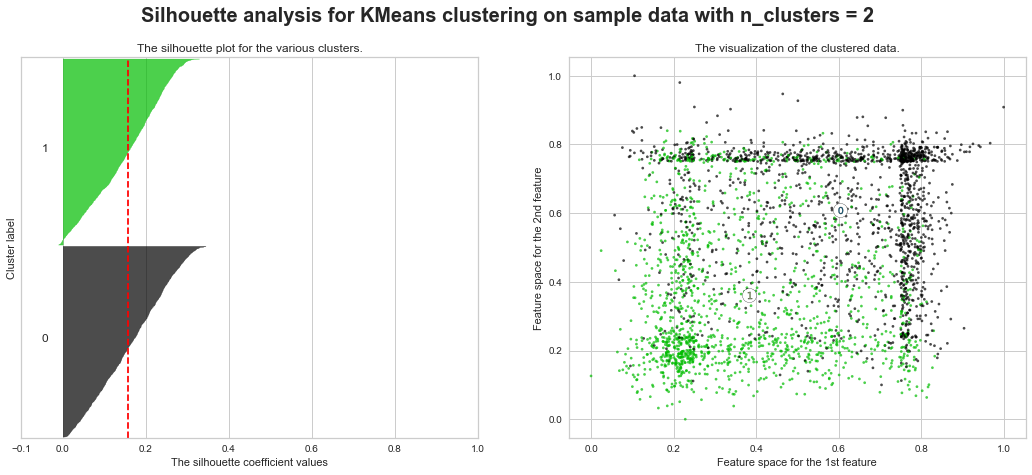

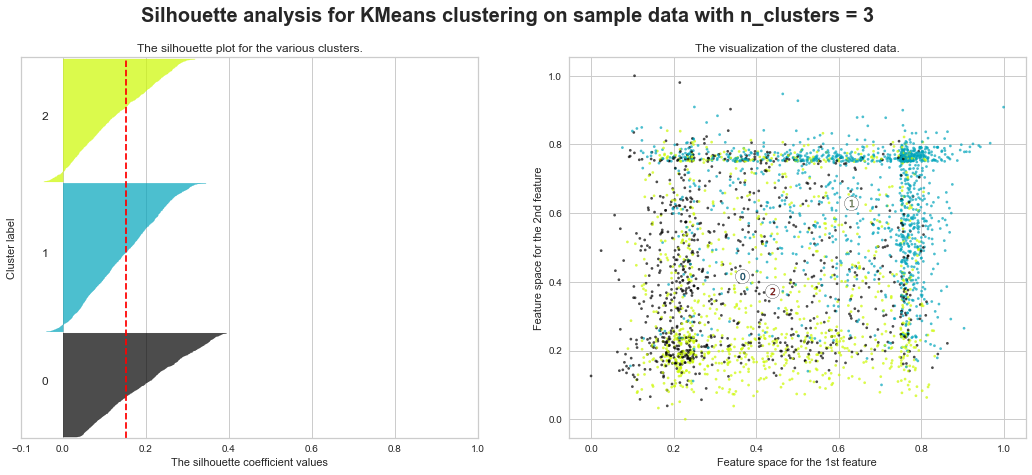

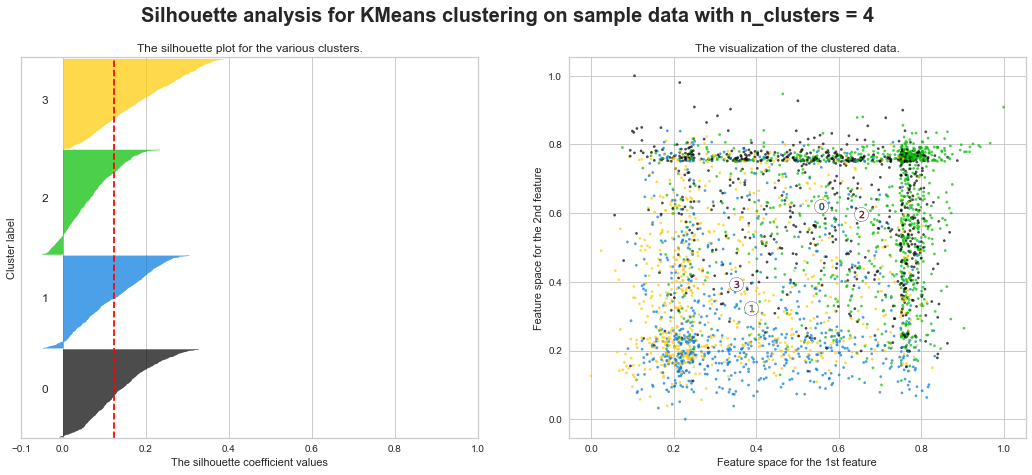

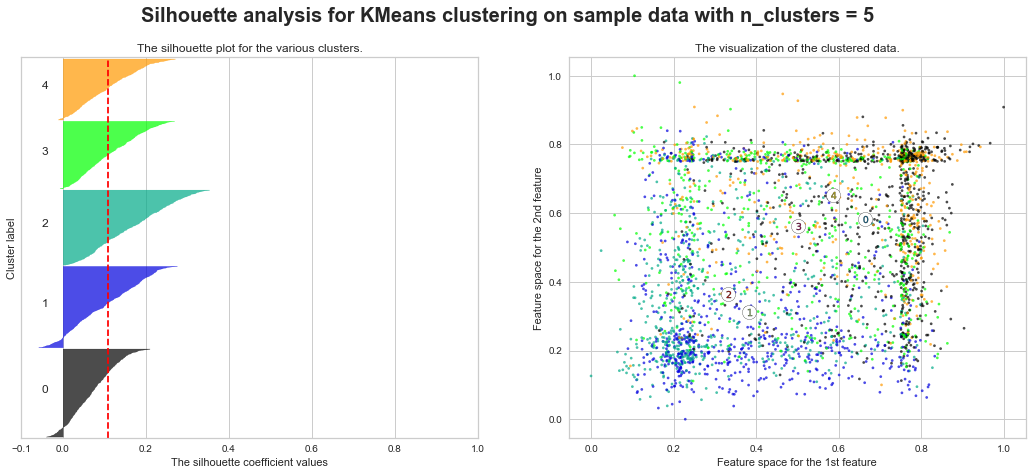

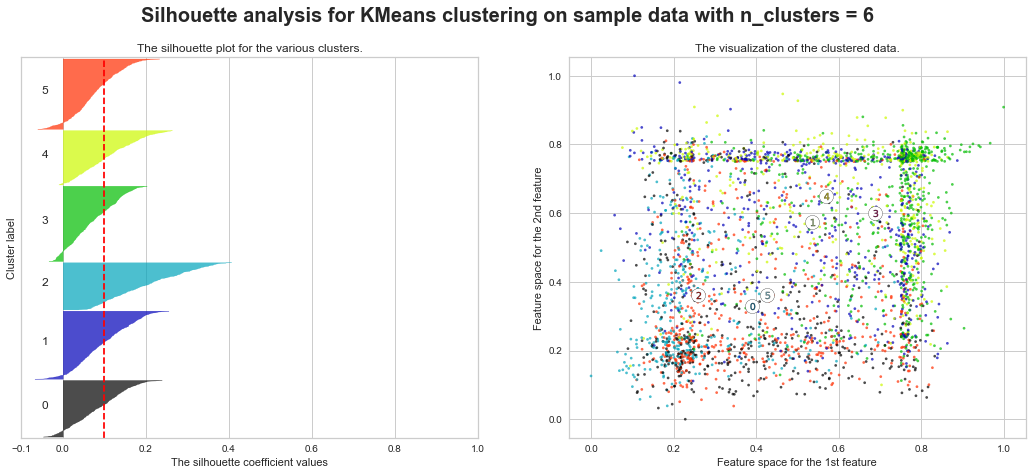

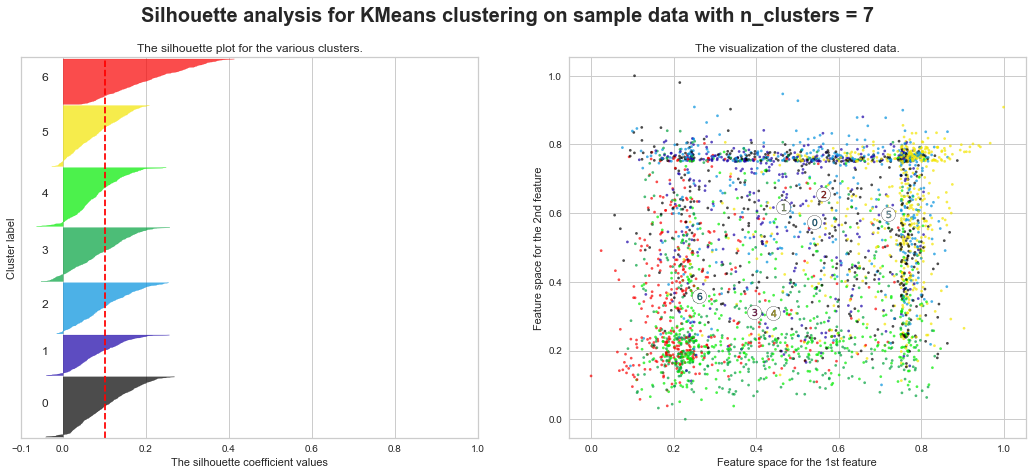

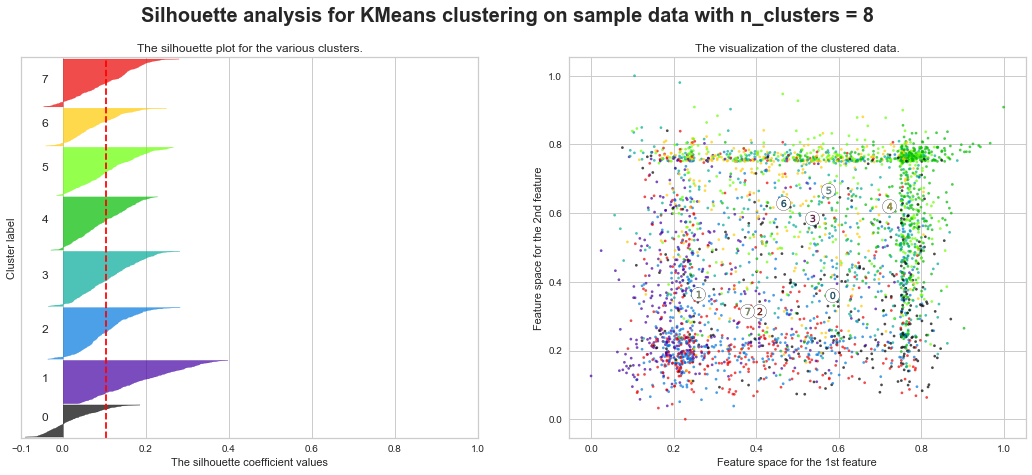

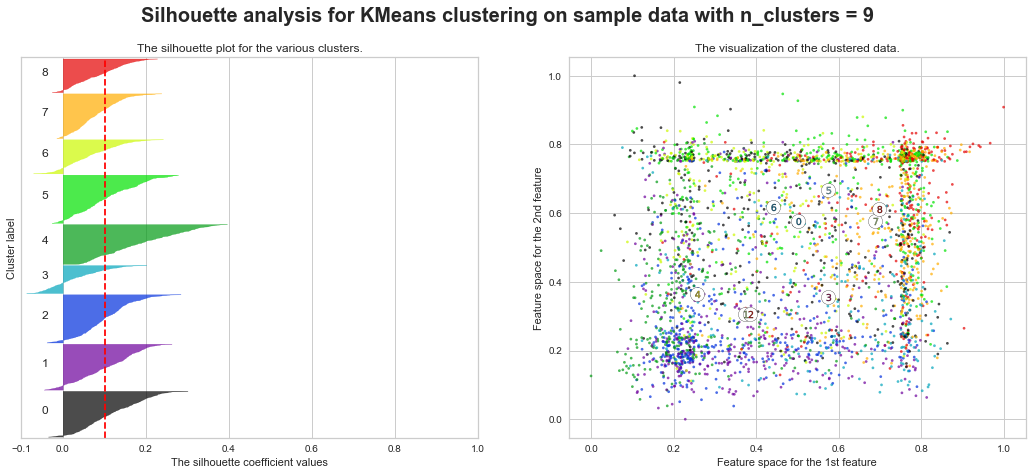

In [37]:
for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_norm1) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X_norm1)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_norm1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_norm1, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_norm1[:, 0], X_norm1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=20, fontweight='bold')

plt.show()
